In [32]:
import math
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.MolStandardize import rdMolStandardize
IPythonConsole.drawOptions.comicMode=True
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.info')
import rdkit
print(rdkit.__version__)

2021.03.1


# MolStandardize pieces

## Cleanup (normalizing functional groups)

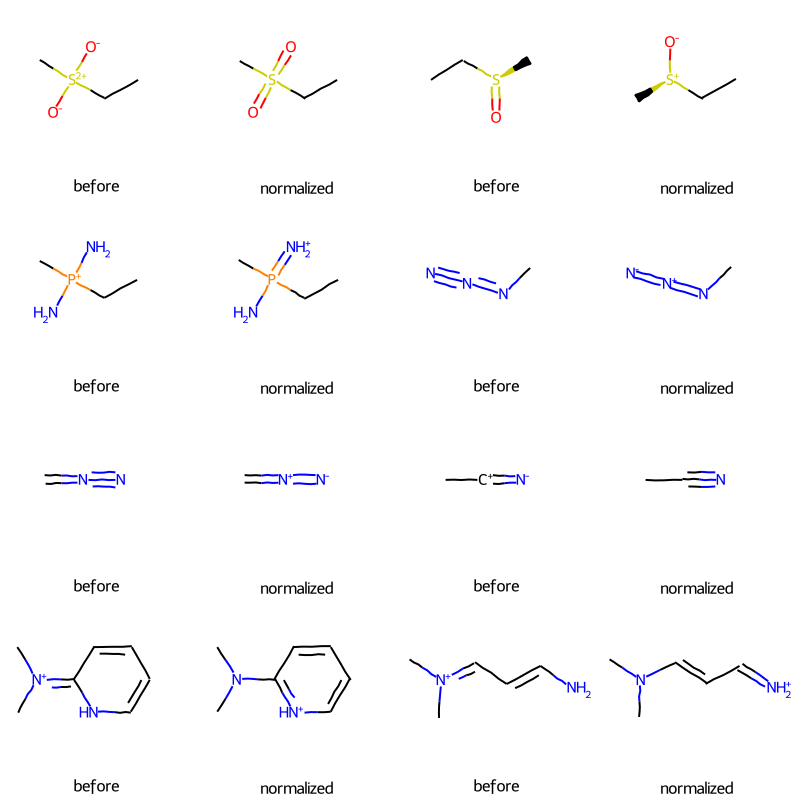

In [55]:
smis = ('C[S+2]([O-])([O-])CC','CC[S@](=O)C','C[P+](CC)(N)N','CN=N#N','C=N#N','[N-]=[C+]C','[nH]1c(=[N+](C)C)cccc1','NC=C-C=[N+](C)C')
ms = []
for smi in smis:
    m = Chem.MolFromSmiles(smi,sanitize=False)
    m.UpdatePropertyCache(strict=False)
    Chem.SanitizeMol(m,sanitizeOps=(Chem.SANITIZE_ALL^Chem.SANITIZE_CLEANUP^Chem.SANITIZE_PROPERTIES))
    cm = rdMolStandardize.Normalize(m)
    ms.extend([m,cm])
Draw.MolsToGridImage(ms,molsPerRow=4,legends=['before','normalized']*(len(ms)//2))

## Neutralizing

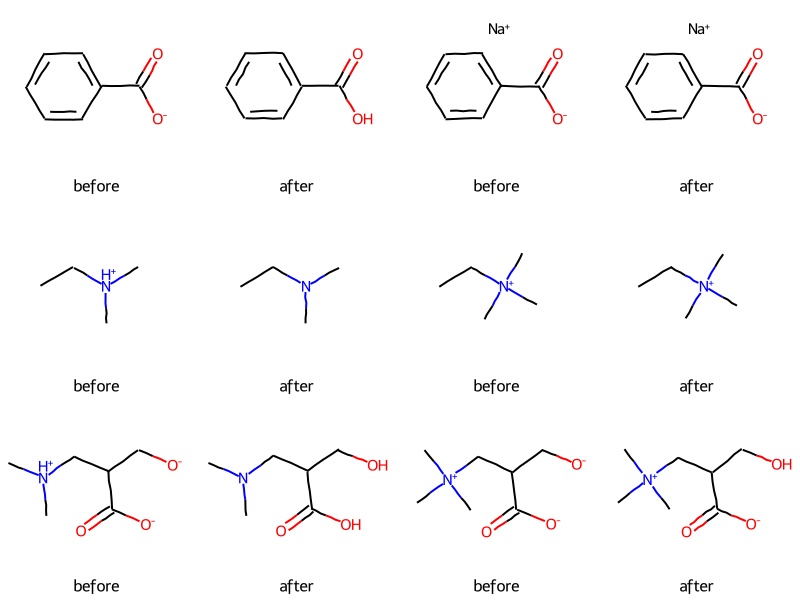

In [33]:
uncharger = rdMolStandardize.Uncharger()

smis = ('c1ccccc1C(=O)[O-]','c1ccccc1C(=O)[O-].[Na+]','CC[NH+](C)C','CC[N+](C)(C)C',
       '[O-]CC(C(=O)[O-])C[NH+](C)C','[O-]CC(C(=O)[O-])C[N+](C)(C)C')
ms = []
for smi in smis:
    m = Chem.MolFromSmiles(smi)
    cm = uncharger.uncharge(m)
    ms.extend([m,cm])
Draw.MolsToGridImage(ms,molsPerRow=4,legends=['before','after']*(len(ms)/## /2))

## Reionization

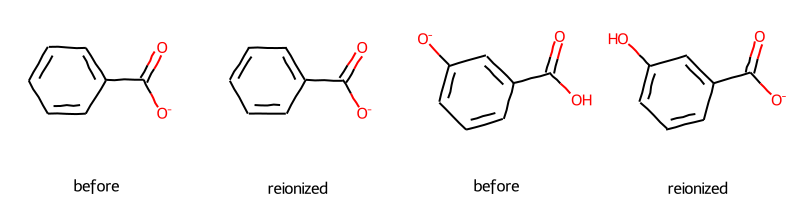

In [34]:
smis = ('c1ccccc1C(=O)[O-]','c1ccc([O-])cc1C(=O)O')#,'c1ccc(O)cc1C(=O)O.[Na]')
ms = []
for smi in smis:
    m = Chem.MolFromSmiles(smi)
    im = rdMolStandardize.Reionize(m)
    ms.extend([m,im])
Draw.MolsToGridImage(ms,molsPerRow=4,legends=['before','reionized']*(len(ms)//2))

## Finding the parent fragment

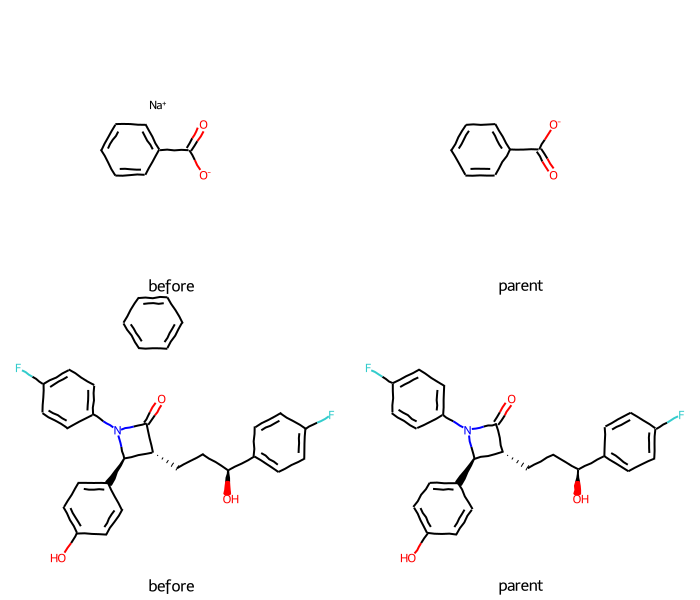

In [35]:
smis = ('c1ccccc1C(=O)[O-].[Na+]','O=C1[C@H](CC[C@H](O)c2ccc(F)cc2)[C@@H](c2ccc(O)cc2)N1c1ccc(F)cc1.c1ccccc1')
ms = []
for smi in smis:
    m = Chem.MolFromSmiles(smi)
    im = rdMolStandardize.FragmentParent(m)
    ms.extend([m,im])
Draw.MolsToGridImage(ms,molsPerRow=2,legends=['before','parent']*(len(ms)//2), subImgSize=(350,300))

## Combining neutralization with the parent fragment identification

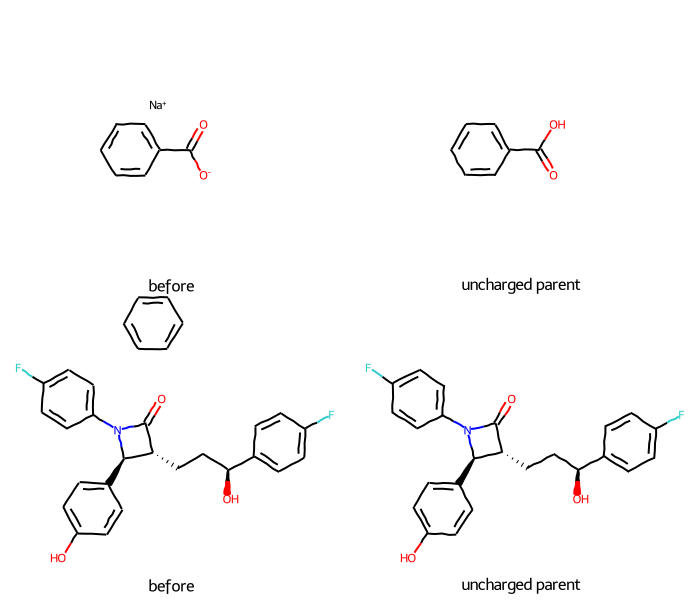

In [36]:
uncharger = rdMolStandardize.Uncharger()
smis = ('c1ccccc1C(=O)[O-].[Na+]','O=C1[C@H](CC[C@H](O)c2ccc(F)cc2)[C@@H](c2ccc(O)cc2)N1c1ccc(F)cc1.c1ccccc1')
ms = []
for smi in smis:
    m = Chem.MolFromSmiles(smi)
    im = uncharger.uncharge(rdMolStandardize.FragmentParent(m))
    ms.extend([m,im])
Draw.MolsToGridImage(ms,molsPerRow=2,legends=['before','uncharged parent']*(len(ms)//2), subImgSize=(350,300))

## Breaking bonds to metal atoms

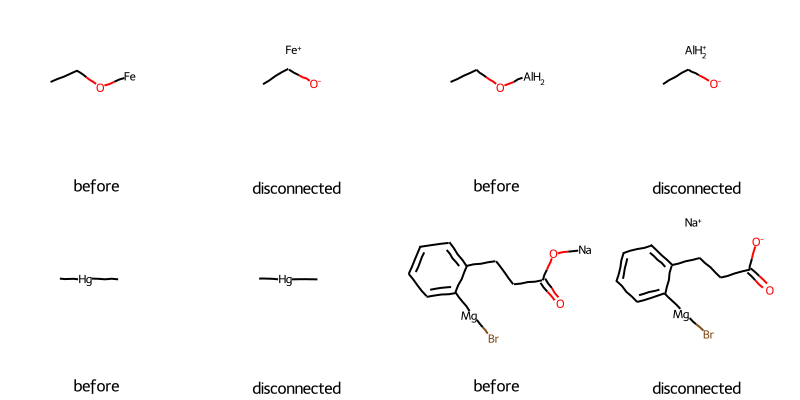

In [60]:
md = rdMolStandardize.MetalDisconnector()
smis = ('CCO[Fe]','CCO[AlH2]','C[Hg]C','Br[Mg]c1ccccc1CCC(=O)O[Na]')
ms = []
for smi in smis:
    m = Chem.MolFromSmiles(smi)
    im = md.Disconnect(m)
    ms.extend([m,im])
Draw.MolsToGridImage(ms,molsPerRow=4,legends=['before','disconnected']*(len(ms)//2))

# Applying this to a real molecule

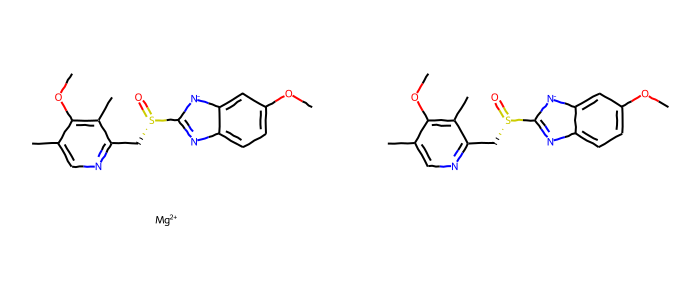

In [20]:
IPythonConsole.molSize = 700,300
esomeprazole = Chem.MolFromMolBlock('''
  Mrv1921 04212108402D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 49 52 0 0 1
M  V30 BEGIN ATOM
M  V30 1 C 8.7797 0.8405 0 0
M  V30 2 O 7.446 1.6105 0 0
M  V30 3 C 6.1123 0.8405 0 0
M  V30 4 C 6.1123 -0.6995 0 0
M  V30 5 C 4.7786 -1.4695 0 0
M  V30 6 C 3.445 -0.6995 0 0
M  V30 7 N 1.9803 -1.1754 0 0
M  V30 8 C 1.0751 0.0705 0 0
M  V30 9 S -0.4649 0.0705 0 0 CFG=1
M  V30 10 O -1.2349 1.4041 0 0
M  V30 11 C -1.2349 -1.2632 0 0
M  V30 12 C -2.7749 -1.2632 0 0
M  V30 13 N -3.5449 -2.5969 0 0
M  V30 14 C -5.0849 -2.5969 0 0
M  V30 15 C -5.8549 -1.2632 0 0
M  V30 16 C -7.3949 -1.2632 0 0
M  V30 17 C -5.0849 0.0705 0 0
M  V30 18 O -5.8549 1.4041 0 0
M  V30 19 C -5.0849 2.7378 0 0
M  V30 20 C -3.5449 0.0705 0 0
M  V30 21 C -2.7749 1.4041 0 0
M  V30 22 N 1.9803 1.3163 0 0 CHG=-1
M  V30 23 C 3.445 0.8405 0 0
M  V30 24 C 4.7786 1.6105 0 0
M  V30 25 C 29.3542 0.8405 0 0
M  V30 26 O 28.0205 1.6105 0 0
M  V30 27 C 26.6868 0.8405 0 0
M  V30 28 C 26.6868 -0.6995 0 0
M  V30 29 C 25.3532 -1.4695 0 0
M  V30 30 C 24.0195 -0.6995 0 0
M  V30 31 N 22.5549 -1.1754 0 0
M  V30 32 C 21.6497 0.0705 0 0
M  V30 33 S 20.1097 0.0705 0 0 CFG=1
M  V30 34 O 19.3397 1.4041 0 0
M  V30 35 C 19.3397 -1.2632 0 0
M  V30 36 C 17.7997 -1.2632 0 0
M  V30 37 N 17.0297 -2.5969 0 0
M  V30 38 C 15.4897 -2.5969 0 0
M  V30 39 C 14.7197 -1.2632 0 0
M  V30 40 C 13.1797 -1.2632 0 0
M  V30 41 C 15.4897 0.0705 0 0
M  V30 42 O 14.7197 1.4041 0 0
M  V30 43 C 15.4897 2.7378 0 0
M  V30 44 C 17.0297 0.0705 0 0
M  V30 45 C 17.7997 1.4041 0 0
M  V30 46 N 22.5549 1.3163 0 0 CHG=-1
M  V30 47 C 24.0195 0.8405 0 0
M  V30 48 C 25.3532 1.6105 0 0
M  V30 49 Mg 0 -5.6769 0 0 CHG=2
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 1 2 3
M  V30 3 2 3 4
M  V30 4 1 4 5
M  V30 5 2 5 6
M  V30 6 1 6 7
M  V30 7 2 7 8
M  V30 8 1 9 8
M  V30 9 2 9 10
M  V30 10 1 9 11 CFG=3
M  V30 11 1 11 12
M  V30 12 2 12 13
M  V30 13 1 13 14
M  V30 14 2 14 15
M  V30 15 1 15 16
M  V30 16 1 15 17
M  V30 17 1 17 18
M  V30 18 1 18 19
M  V30 19 2 17 20
M  V30 20 1 12 20
M  V30 21 1 20 21
M  V30 22 1 8 22
M  V30 23 1 22 23
M  V30 24 1 6 23
M  V30 25 2 23 24
M  V30 26 1 3 24
M  V30 27 1 25 26
M  V30 28 1 26 27
M  V30 29 2 27 28
M  V30 30 1 28 29
M  V30 31 2 29 30
M  V30 32 1 30 31
M  V30 33 2 31 32
M  V30 34 1 33 32
M  V30 35 2 33 34
M  V30 36 1 33 35 CFG=3
M  V30 37 1 35 36
M  V30 38 2 36 37
M  V30 39 1 37 38
M  V30 40 2 38 39
M  V30 41 1 39 40
M  V30 42 1 39 41
M  V30 43 1 41 42
M  V30 44 1 42 43
M  V30 45 2 41 44
M  V30 46 1 36 44
M  V30 47 1 44 45
M  V30 48 1 32 46
M  V30 49 1 46 47
M  V30 50 1 30 47
M  V30 51 2 47 48
M  V30 52 1 27 48
M  V30 END BOND
M  V30 END CTAB
M  END
''')
esomeprazole

## Cleanup (standardizing functional groups)

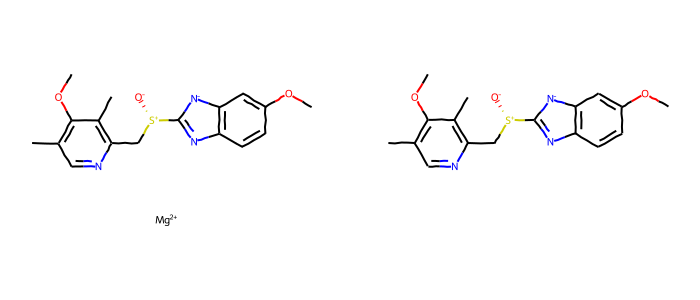

In [21]:
rdMolStandardize.Cleanup(esomeprazole)

## Removing fragments:

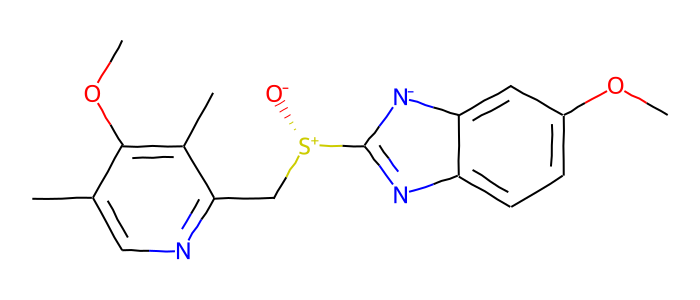

In [22]:
rdMolStandardize.FragmentParent(esomeprazole)

## Neutralization

RDKit INFO: [08:27:55] Initializing MetalDisconnector
RDKit INFO: [08:27:55] Running MetalDisconnector
RDKit INFO: [08:27:55] Initializing Normalizer
RDKit INFO: [08:27:55] Running Normalizer
RDKit INFO: [08:27:55] Rule applied: Sulfoxideto-S+(O-)-
RDKit INFO: [08:27:55] Rule applied: Sulfoxideto-S+(O-)-
RDKit INFO: [08:29:32] Initializing MetalDisconnector
RDKit INFO: [08:29:32] Running MetalDisconnector
RDKit INFO: [08:29:32] Initializing Normalizer
RDKit INFO: [08:29:32] Running Normalizer
RDKit INFO: [08:29:32] Rule applied: Sulfoxideto-S+(O-)-
RDKit INFO: [08:29:32] Rule applied: Sulfoxideto-S+(O-)-
RDKit INFO: [08:29:52] Initializing MetalDisconnector
RDKit INFO: [08:29:52] Running MetalDisconnector
RDKit INFO: [08:29:52] Initializing Normalizer
RDKit INFO: [08:29:52] Running Normalizer
RDKit INFO: [08:29:52] Rule applied: Sulfoxideto-S+(O-)-
RDKit INFO: [08:29:52] Rule applied: Sulfoxideto-S+(O-)-
RDKit INFO: [08:30:46] Initializing MetalDisconnector
RDKit INFO: [08:30:46] Runni

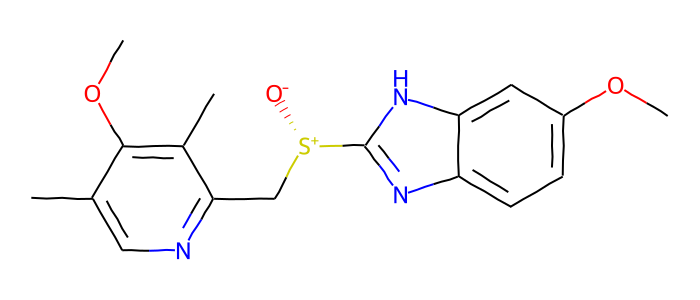

In [23]:
uncharger = rdMolStandardize.Uncharger()
parent = uncharger.uncharge(rdMolStandardize.FragmentParent(esomeprazole))
parent

## Tautomers

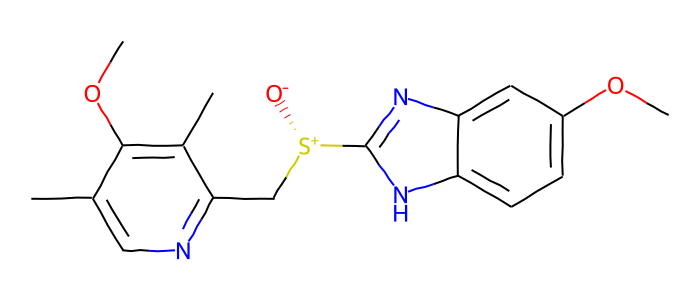

In [24]:
te = rdMolStandardize.TautomerEnumerator()
parent_taut = te.Canonicalize(parent)
parent_taut

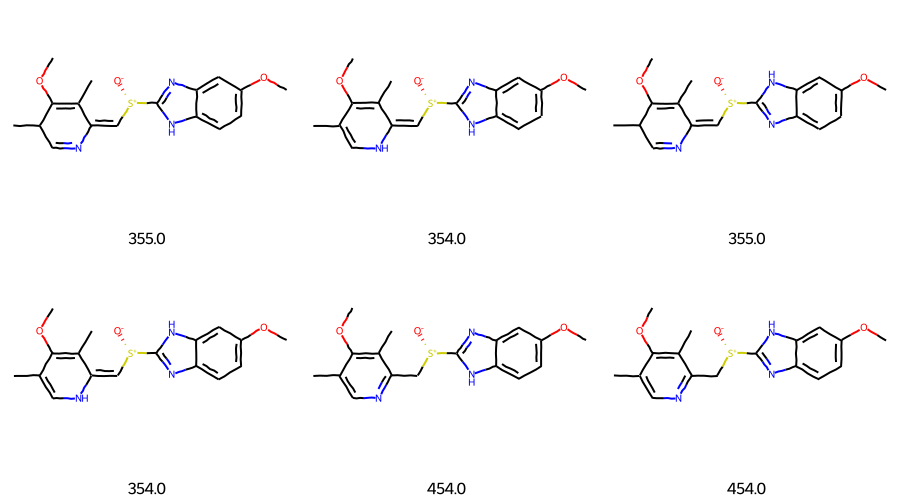

In [25]:
tauts = te.Enumerate(parent)
scores = [f'{te.ScoreTautomer(x):.1f}' for x in tauts]
Draw.MolsToGridImage(tauts,subImgSize=(300,250),legends=scores)

### An aside in case anyone thinks this is purely of theoretical interest:
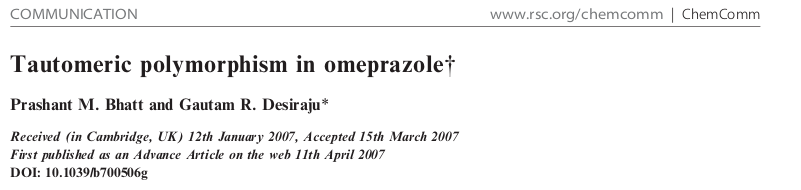

We have an alternative allows identical tautomers to be recognized without requiring canonicalization:

In [26]:
from rdkit.Chem import rdMolHash
print(rdMolHash.MolHash(tauts[-2],rdMolHash.HashFunction.HetAtomTautomer))
print(rdMolHash.MolHash(tauts[-1],rdMolHash.HashFunction.HetAtomTautomer))

CO[C]1[CH][CH][C]2[N][C]([S]([O])C[C]3[N][CH][C](C)[C](OC)[C]3C)[N][C]2[CH]1_1_0
CO[C]1[CH][CH][C]2[N][C]([S]([O])C[C]3[N][CH][C](C)[C](OC)[C]3C)[N][C]2[CH]1_1_0
